In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Ejecución del modelo y obtención de las curvas de peligro

In [2]:
dir_route = '/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/Chancay/09_Chancay_VZ2019_Vs760_Logic Tree_Properties modified - Forearc'

In [3]:
job_route = dir_route + '/job.ini'
!oq engine --run '{job_route}'

/Users/emanuelsotoortega/Documents/DeepSkill/Seismic hazard/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:297: ExperimentalWarning: KuehnEtAl2020SInter is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
/Users/emanuelsotoortega/Documents/DeepSkill/Seismic hazard/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:297: ExperimentalWarning: KuehnEtAl2020SSlab is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
[2024-02-07 15:48:17 #19 INFO] emanuelsotoortega@MacBook-Air-de-Emanuel.local running /Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/Chancay/09_Chancay_VZ2019_Vs760_Logic Tree_Properties modified - Forearc/job.ini [--hc=None]
[2024-02-07 15:48:17 #19 INFO] Using engine version 3.18.0
[2024-02-07 15:48:18 #19 WARNING] Using 8 processpool workers
[2024-02-07 15:

In [4]:
calculation_id = 19

In [6]:
output_route = dir_route + '/output'
!oq engine --export-outputs {calculation_id} '{output_route}'

Exporting fullreport...
/Users/emanuelsotoortega/Documents/DeepSkill/Seismic hazard/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:297: ExperimentalWarning: KuehnEtAl2020SInter is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
/Users/emanuelsotoortega/Documents/DeepSkill/Seismic hazard/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:297: ExperimentalWarning: KuehnEtAl2020SSlab is experimental and may change in future versions - the user is liable for their application
  warnings.warn(msg, ExperimentalWarning)
/Users/emanuelsotoortega/Documents/DeepSkill/seismic-hazard-simulator/Chancay/09_Chancay_VZ2019_Vs760_Logic Tree_Properties modified - Forearc/output/report_19.rst
Exporting hcurves...
/Users/emanuelsotoortega/Documents/DeepSkill/Seismic hazard/.env/lib/python3.11/site-packages/openquake/hazardlib/gsim/base.py:297: ExperimentalWarning: KuehnEtAl2020SInter is 

In [7]:
ts_list = ['PGA', 'SA(0.2)', 'SA(0.5)', 'SA(1.0)', 'SA(2.0)']
ts_values = [0.01, 0.20, 0.50, 1.00, 2.00]

import os
hazard_mean_files = os.listdir(output_route)
hazard_mean_csv_files = []

for ts in ts_list:
    for csv_file in hazard_mean_files:
        if csv_file.startswith('hazard_curve-mean-' + ts):
            hazard_mean_csv_files.append(csv_file)

hazard_mean_csv_files

['hazard_curve-mean-PGA_19.csv',
 'hazard_curve-mean-SA(0.2)_19.csv',
 'hazard_curve-mean-SA(0.5)_19.csv',
 'hazard_curve-mean-SA(1.0)_19.csv',
 'hazard_curve-mean-SA(2.0)_19.csv']

# Graficación de las curvas de peligro

In [8]:
curves = []

for csv_file in hazard_mean_csv_files:
    curve = pd.read_csv(output_route + '/' + csv_file, header=1)
    curve = curve.iloc[:, 4:].transpose()
    curve.reset_index(inplace=True)
    curve = curve.rename(columns={'index' : 'sa'})
    curve['sa_value'] = curve['sa'].apply(lambda x : float(x[4:]))

    curves.append(curve)

number_points = len(curves[0].columns) - 2
number_points

4

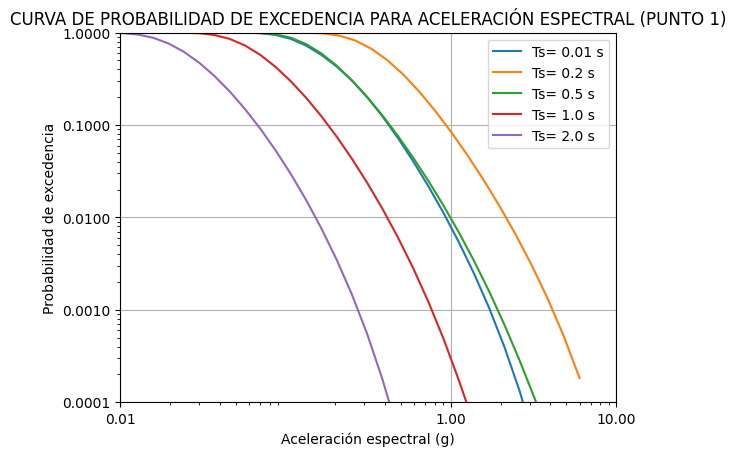

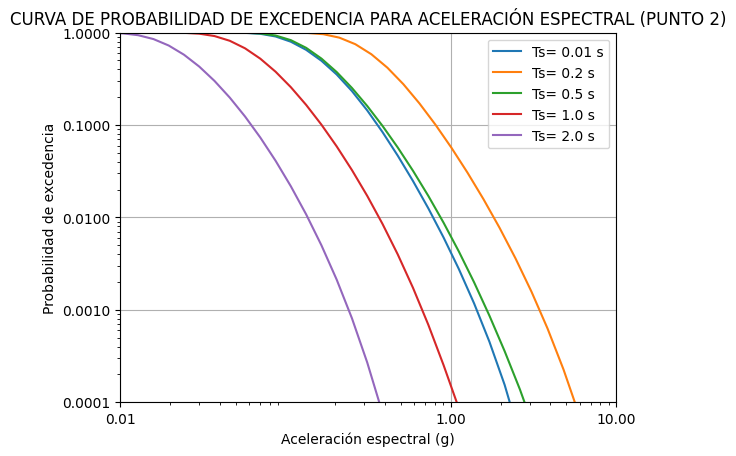

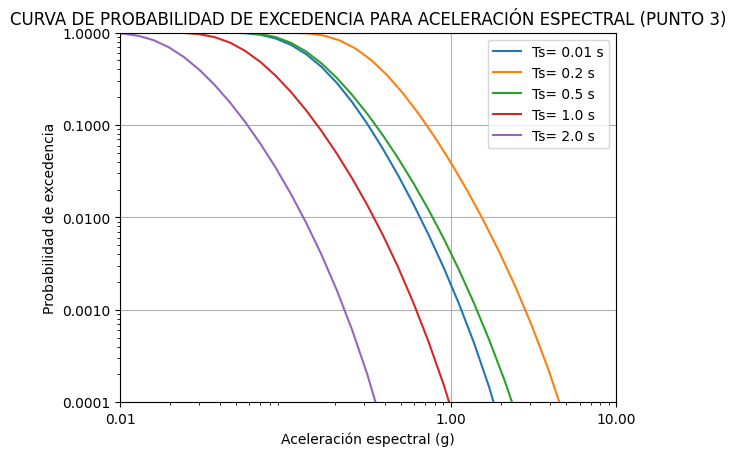

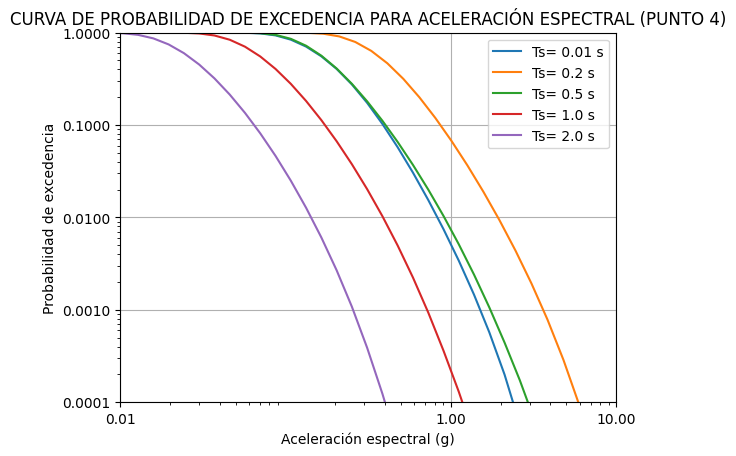

In [9]:
for point in range(number_points):
    fig, ax = plt.subplots()

    ax.set_title('CURVA DE PROBABILIDAD DE EXCEDENCIA PARA ACELERACIÓN ESPECTRAL (PUNTO ' + str(point+1) + ')')

    ax.set_xscale('log')
    ax.set_xlim(0.01, 10.00)
    ax.set_xticks([0.01, 1.00, 10.00])
    ax.set_xlabel('Aceleración espectral (g)')

    ax.set_yscale('log')
    ax.set_ylim(0.0001, 1)
    ax.set_yticks([0.0001, 0.001, 0.01, 0.1, 1])
    ax.set_ylabel('Probabilidad de excedencia')

    ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    for i, curve in enumerate(curves):
        ax.plot(curve['sa_value'], curve[point], label='Ts= ' + str(ts_values[i]) + ' s')

    ax.legend(loc='best')
    plt.grid(True)
    plt.show()

# Generación de Análisis de Peligro sísmico

In [19]:
hazard_uhs_mean_csv = ''


for csv_file in hazard_mean_files:
    if csv_file.startswith('hazard_uhs-mean'):
        hazard_uhs_mean_csv = csv_file

hazard_uhs_mean_csv = output_route + '/' + hazard_uhs_mean_csv

In [20]:
hazard_uhs_mean_df = pd.read_csv(hazard_uhs_mean_csv, header=1)
hazard_uhs_mean_df

,custom_site_id,lon,lat,0.400000~PGA,0.400000~SA(0.02),0.400000~SA(0.05),0.400000~SA(0.075),0.400000~SA(0.1),0.400000~SA(0.15),0.400000~SA(0.2),...,0.005000~SA(0.5),0.005000~SA(0.75),0.005000~SA(1.0),0.005000~SA(1.5),0.005000~SA(2.0),0.005000~SA(3.0),0.005000~SA(4.0),0.005000~SA(5.0),0.005000~SA(7.5),0.005000~SA(10.0)
0,1001,-79.8078,-6.8465,0.212815,0.224031,0.350346,0.459702,0.524934,0.530795,0.475681,...,1.228274,0.763757,0.504552,0.277719,0.184581,0.094922,0.059490,0.043245,0.024880,0.016857
1,1002,-79.5545,-6.7622,0.188304,0.197977,0.309417,0.406497,0.458951,0.465909,0.422395,...,1.066458,0.669512,0.447394,0.246758,0.164672,0.084534,0.052634,0.038055,0.021616,0.014517
2,1003,-79.3173,-6.6360,0.170518,0.178591,0.278932,0.364195,0.412400,0.418808,0.378002,...,0.946863,0.609121,0.414602,0.230376,0.154770,0.079382,0.049140,0.035124,0.019586,0.012899
3,1004,-79.6860,-6.6206,0.205148,0.215238,0.337572,0.440820,0.498606,0.503017,0.450581,...,1.124291,0.708830,0.475768,0.261535,0.173210,0.089689,0.056074,0.040518,0.022957,0.015277
